In [6]:
from pandas import read_csv
from pandas import datetime
from pandas import concat
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import sqrt
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

In [7]:
np.random.seed(1711)
def parser(x):
    return datetime.strptime(x,"%m-%d-%Y")
dataset=read_csv("usdinr_dataset.csv",header=0,date_parser=parser,parse_dates=[0])

NameError: name 'np' is not defined

In [ ]:
print(dataset.head())

In [ ]:
dataset.shape

In [ ]:
series=Series.from_csv("usdinr_dataset.csv",header=0)

In [4]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

NameError: name 'series' is not defined

In [162]:
dataset.shape

(1712, 4)

In [3]:
corr=dataset.corr()

NameError: name 'dataset' is not defined

In [164]:
print(corr)

             USD/INR  BSE Sensex  Gold Price
USD/INR     1.000000    0.755530   -0.856715
BSE Sensex  0.755530    1.000000   -0.721223
Gold Price -0.856715   -0.721223    1.000000


In [165]:
def diagonal_correlation_matrix():
    mask=np.zeros_like(corr,dtype=np.bool)
    mask[np.triu_indices_from(mask)]=True
    
    f,ax=pyplot.subplots(figsize=(11,9))
   
    
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidth=.5,cbar_kws={"shrink":.5})
    
     #sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
               # square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    
    
    
   

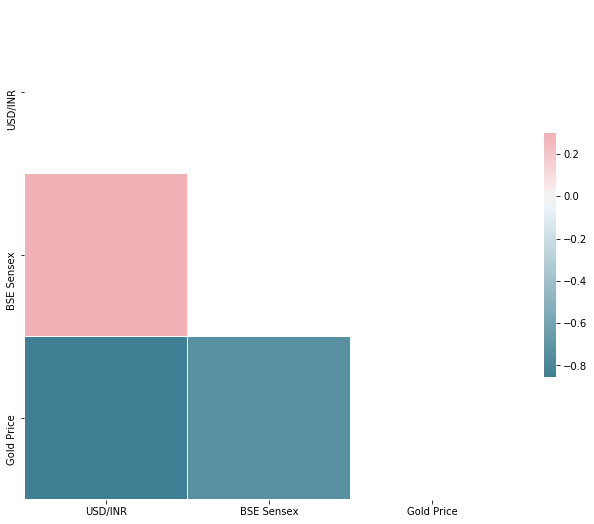

In [166]:
diagonal_correlation_matrix()


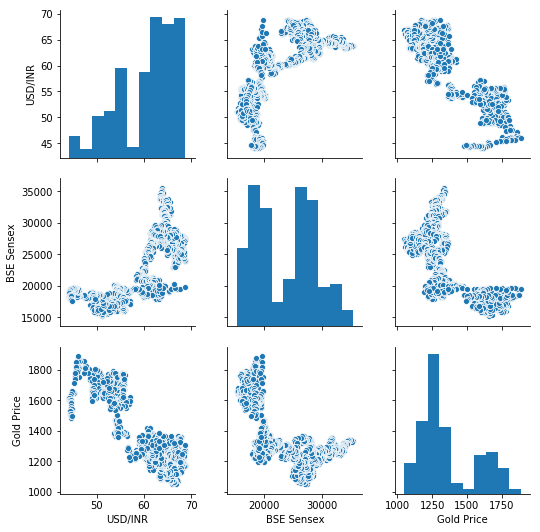

In [167]:
sns.pairplot(dataset)

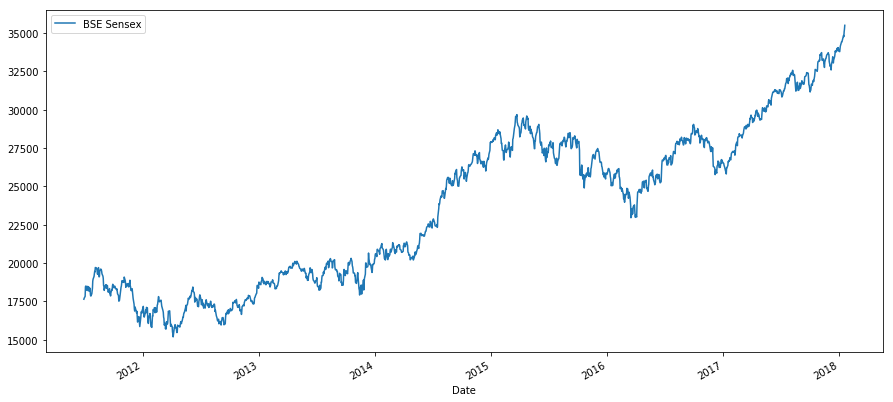

In [168]:
dataset.plot(y="BSE Sensex",x="Date",figsize=(15,7))

In [169]:
def series_to_supervised(data,n_in=1,n_out=1,dropnan=True):
        n_vars=1 if type(data) is list else data.shape[1]
        df=DataFrame(data)
        cols,names=list(),list()
        
        for i in range(n_in,0,-1):
            cols.append(df.shift(i))
            names+=[('var%d(t-%d)' %(j+1,i))for j in range(n_vars)]
            
        for i in range(0,n_out):
            cols.append(df.shift(-i))
            if i==0:
                names+=[('var%d(t)'%(j+1)) for j in range(n_vars)]
                
            else:
                names+=[('var%d(t+%d)'%(j+1,i))for j in range(n_vars)]
                
        agg=concat(cols,axis=1)
        agg.columns=names
        
        if dropnan:
            agg.dropna(inplace=True)
            
        return agg
                

In [170]:
dataset=read_csv("usdinr_dataset.csv",header=0,index_col=0)
values=dataset.values
values=values.astype("float32")
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(values)

In [171]:
reframed=series_to_supervised(scaled,1,1)
reframed.drop(reframed.columns[[4,5]],axis=1,inplace=True)

In [172]:
print(reframed.values)

[[0.79870665 0.99999994 0.3369136  0.80032337]
 [0.80032337 0.9876434  0.32987225 0.80113184]
 [0.80113184 0.9788676  0.3441937  0.80638635]
 ...
 [0.0145514  0.16086441 0.5388472  0.0145514 ]
 [0.0145514  0.13022494 0.54791737 0.02263546]
 [0.02263546 0.12420177 0.5357441  0.02546489]]


In [175]:
values = reframed.values
n_test = 277
train = values[n_test:,:]
test = values[:n_test,:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(1434, 1, 3) (1434,) (277, 1, 3) (277,)


In [176]:
model=Sequential()
#model.add(LSTM(500,input_shape=(train_X.shape[1],train_X.shape[2]),kernel_regularizer=regularizers.l1(0.01)))
model.add(LSTM(500,input_shape=(train_X.shape[1],train_X.shape[2]),kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(1))
model.compile(loss="mae",optimizer="adam",metrics=["mse"])

In [185]:
history=model.fit(train_X ,train_y, epochs=100, batch_size=100, validation_data=(test_X,test_y),verbose=2, shuffle=True)

Train on 1434 samples, validate on 277 samples
Epoch 1/100
 - 2s - loss: 0.0464 - mean_squared_error: 1.6484e-04 - val_loss: 0.0424 - val_mean_squared_error: 4.7893e-05
Epoch 2/100
 - 2s - loss: 0.0460 - mean_squared_error: 1.5766e-04 - val_loss: 0.0424 - val_mean_squared_error: 4.9350e-05
Epoch 3/100
 - 2s - loss: 0.0458 - mean_squared_error: 1.5553e-04 - val_loss: 0.0419 - val_mean_squared_error: 4.6138e-05
Epoch 4/100
 - 2s - loss: 0.0458 - mean_squared_error: 1.6197e-04 - val_loss: 0.0433 - val_mean_squared_error: 7.0393e-05
Epoch 5/100
 - 2s - loss: 0.0460 - mean_squared_error: 1.6952e-04 - val_loss: 0.0448 - val_mean_squared_error: 9.4237e-05
Epoch 6/100
 - 2s - loss: 0.0468 - mean_squared_error: 1.8885e-04 - val_loss: 0.0428 - val_mean_squared_error: 6.4534e-05
Epoch 7/100
 - 2s - loss: 0.0457 - mean_squared_error: 1.7106e-04 - val_loss: 0.0412 - val_mean_squared_error: 4.6693e-05
Epoch 8/100
 - 2s - loss: 0.0454 - mean_squared_error: 1.6729e-04 - val_loss: 0.0426 - val_mean_squ

Epoch 68/100
 - 2s - loss: 0.0386 - mean_squared_error: 1.6606e-04 - val_loss: 0.0349 - val_mean_squared_error: 5.2922e-05
Epoch 69/100
 - 2s - loss: 0.0387 - mean_squared_error: 1.6783e-04 - val_loss: 0.0351 - val_mean_squared_error: 5.6201e-05
Epoch 70/100
 - 2s - loss: 0.0381 - mean_squared_error: 1.5674e-04 - val_loss: 0.0352 - val_mean_squared_error: 5.8539e-05
Epoch 71/100
 - 2s - loss: 0.0382 - mean_squared_error: 1.6248e-04 - val_loss: 0.0367 - val_mean_squared_error: 8.2764e-05
Epoch 72/100
 - 2s - loss: 0.0382 - mean_squared_error: 1.6356e-04 - val_loss: 0.0342 - val_mean_squared_error: 4.8368e-05
Epoch 73/100
 - 2s - loss: 0.0383 - mean_squared_error: 1.6495e-04 - val_loss: 0.0346 - val_mean_squared_error: 5.1910e-05
Epoch 74/100
 - 2s - loss: 0.0377 - mean_squared_error: 1.5557e-04 - val_loss: 0.0339 - val_mean_squared_error: 4.6086e-05
Epoch 75/100
 - 2s - loss: 0.0376 - mean_squared_error: 1.5679e-04 - val_loss: 0.0369 - val_mean_squared_error: 9.5885e-05
Epoch 76/100
 - 

In [201]:
def get_y_hat(test_X,test_y):
    yhat=model.predict(test_X)
    test_X=test_X.reshape((test_X.shape[0],test_X.shape[2]))
    
    inv_yhat=concatenate((yhat,test_X[:,1:]),axis=1)
    inv_yhat=scaler.inverse_transform(inv_yhat)
    inv_yhat=inv_yhat[:,0]
    
    test_y=test_y.reshape((len(test_y),1))
    inv_y=concatenate((test_y,test_X[:,1:]),axis=1)
    inv_y=scaler.inverse_transform(inv_y)
    inv_y=inv_y[:,0]
    
    
    
    rmse=sqrt(mean_squared_error(inv_y,inv_yhat))
    #print("Test Rmse : %.3f"%rmse)
    
    print("Test Rmse ",rmse)
    
    inv_yhat=inv_yhat.reshape((277,1))
    inv_yhat=inv_y.reshape((277,1))
    
    
    inv_yhat=pd.DataFrame(inv_yhat)
    inv_y=pd.DataFrame(inv_y)
    
    inv_yhat+=0.15
    
    return inv_yhat,inv_y

Test Rmse  0.18698911


<function matplotlib.pyplot.legend(*args, **kwargs)>

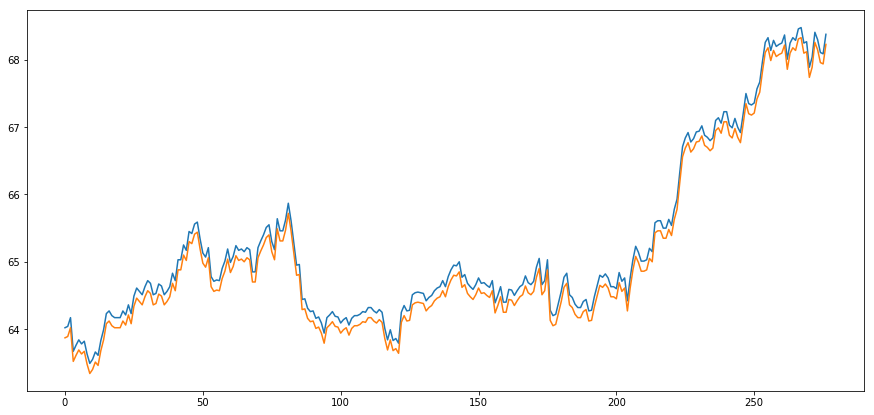

In [203]:
inv_yhat,inv_y=get_y_hat(test_X,test_y)
pyplot.figure(figsize=(15,7))
pyplot.plot(inv_yhat,label="Predicted")
pyplot.plot(inv_y,label="Actual")
pyplot.legend